In [5]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['safe', 'disaster'], yticklabels=['safe', 'disaster'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [45]:
#function to prepare different Classification models

def model_dvt(df_train, df_test):
    
    Y_train, Y_test, X_train, X_test = df_train.target, df_test.target, df_train.drop("target", axis=1), df_test.drop("target", axis=1)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

In [41]:
import pandas as pd 
df_train = pd.read_csv('artifacts/data_transformation/train.csv')
df_test = pd.read_csv('artifacts/data_transformation/test.csv')

In [38]:
df_train.target

0     0
1     0
2     0
3     1
4     0
     ..
56    1
57    0
58    0
59    0
60    1
Name: target, Length: 61, dtype: int64

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (61, 34)
Test Data Dimensions :  (1904, 34)

 Random Forest Classifier
CPU times: total: 1.03 s
Wall time: 1.7 s

 Confusion Matrix


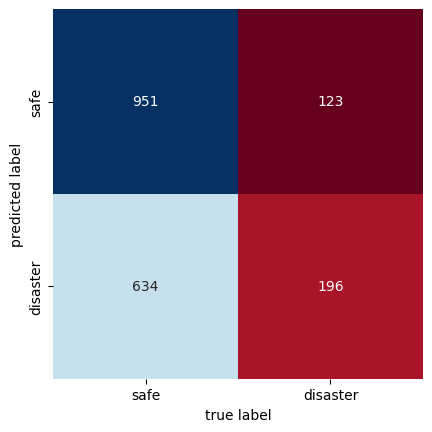


 Classification Report 

              precision    recall  f1-score   support

           0       0.60      0.89      0.72      1074
           1       0.61      0.24      0.34       830

    accuracy                           0.60      1904
   macro avg       0.61      0.56      0.53      1904
weighted avg       0.61      0.60      0.55      1904

Overall Accuracy :  60.24
Precision Score :  61.44
Recall Score :  23.61
AUC :  58.69 



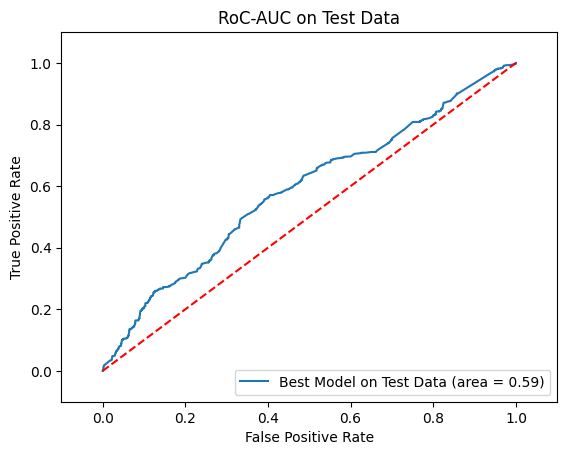

--------------------------------------------------------------------------

 AdaBoost Classifier
CPU times: total: 516 ms
Wall time: 1.03 s

 Confusion Matrix


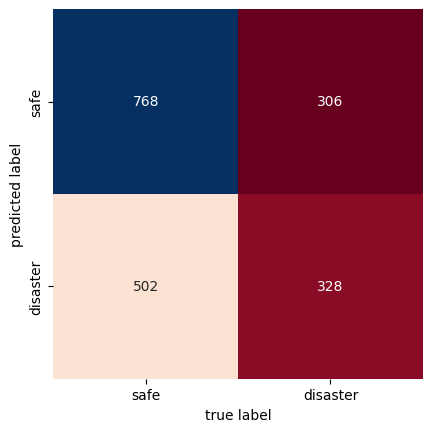


 Classification Report 

              precision    recall  f1-score   support

           0       0.60      0.72      0.66      1074
           1       0.52      0.40      0.45       830

    accuracy                           0.58      1904
   macro avg       0.56      0.56      0.55      1904
weighted avg       0.57      0.58      0.56      1904

Overall Accuracy :  57.56
Precision Score :  51.74
Recall Score :  39.52
AUC :  56.74 



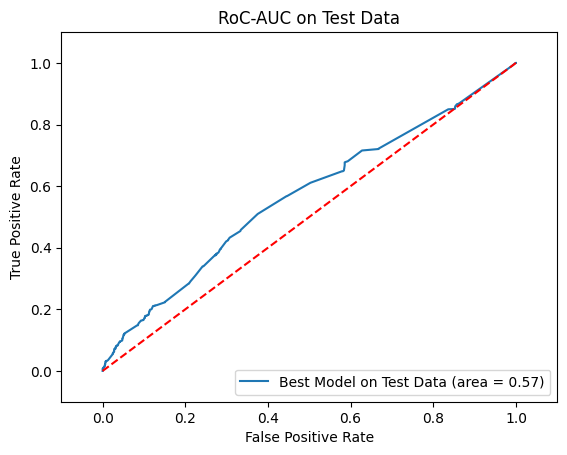

--------------------------------------------------------------------------

 Grdient Boosting Classifier
CPU times: total: 93.8 ms
Wall time: 170 ms

 Confusion Matrix


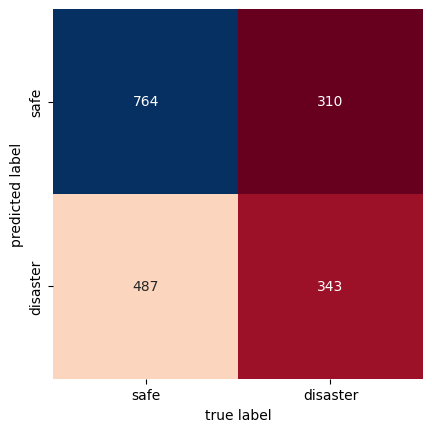


 Classification Report 

              precision    recall  f1-score   support

           0       0.61      0.71      0.66      1074
           1       0.53      0.41      0.46       830

    accuracy                           0.58      1904
   macro avg       0.57      0.56      0.56      1904
weighted avg       0.57      0.58      0.57      1904

Overall Accuracy :  58.14
Precision Score :  52.53
Recall Score :  41.33
AUC :  56.87 



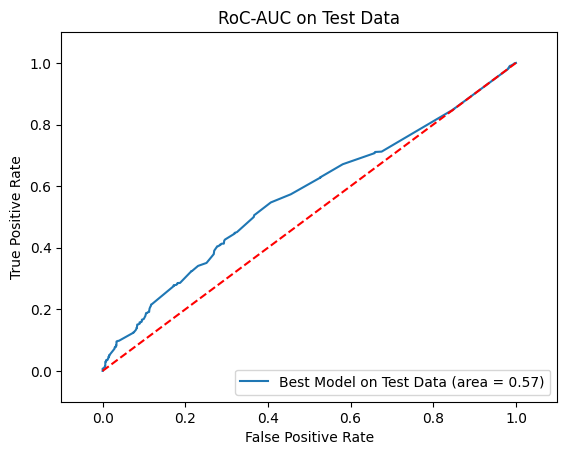

--------------------------------------------------------------------------

 Naive Bayes Classifier
CPU times: total: 0 ns
Wall time: 4 ms

 Confusion Matrix


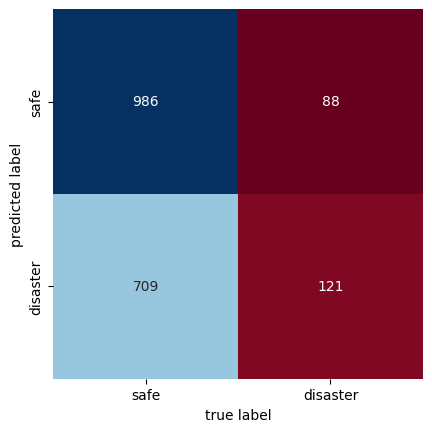


 Classification Report 

              precision    recall  f1-score   support

           0       0.58      0.92      0.71      1074
           1       0.58      0.15      0.23       830

    accuracy                           0.58      1904
   macro avg       0.58      0.53      0.47      1904
weighted avg       0.58      0.58      0.50      1904

Overall Accuracy :  58.14
Precision Score :  57.89
Recall Score :  14.58
AUC :  54.29 



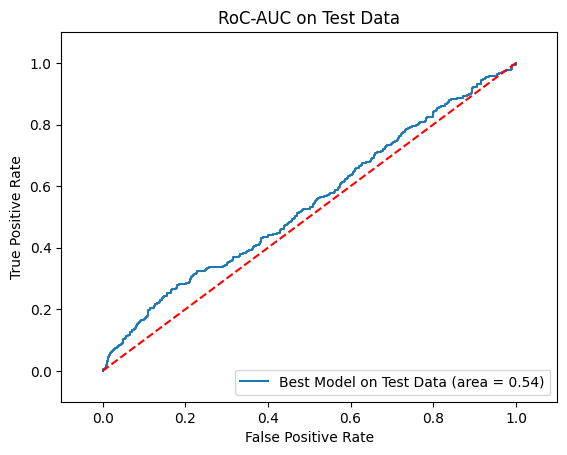

--------------------------------------------------------------------------
CPU times: total: 4.95 s
Wall time: 8.75 s


In [46]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(df_train, df_test)

### Hyper-parameter tuning models that used TF-BoW embedding data

### Grid-Search hyperparameter tuning on Random Forest Classifier



In [50]:
X_train= pd.read_csv('artifacts/data_transformation/train.csv').drop('target', axis=1)
Y_train= pd.read_csv('artifacts/data_transformation/train.csv').target

X_test= pd.read_csv('artifacts/data_transformation/test.csv').drop('target', axis=1)
Y_test= pd.read_csv('artifacts/data_transformation/test.csv').target

In [48]:
grid_params = {'n_estimators' : [100,200,300,400,500],
               'max_depth' : [10, 7, 5, 3],
               'criterion' : ['entropy', 'gini']}

RFC = RandomForestClassifier()
grid_object = GridSearchCV(estimator = RFC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

%time grid_object.fit(X_train, Y_train)

CPU times: total: 1.75 s
Wall time: 2min 54s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 7, 5, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='roc_auc')

Best_ROC-AUC :  66.11
Best model :  RandomForestClassifier(max_depth=10, n_estimators=300)

 Confusion Matrix


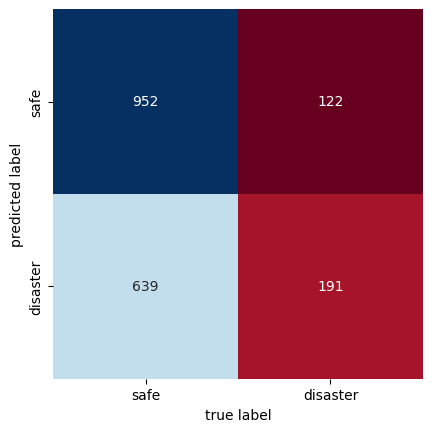


 Classification Report 

              precision    recall  f1-score   support

           0       0.60      0.89      0.71      1074
           1       0.61      0.23      0.33       830

    accuracy                           0.60      1904
   macro avg       0.60      0.56      0.52      1904
weighted avg       0.60      0.60      0.55      1904

Overall Accuracy :  60.03
Precision Score :  61.02
Recall Score :  23.01
AUC :  58.8 



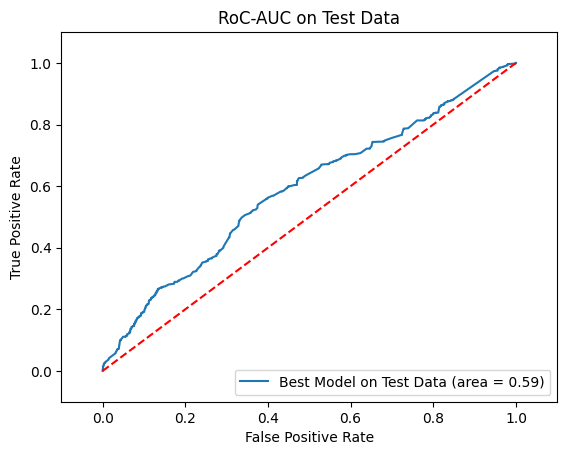

--------------------------------------------------------------------------
CPU times: total: 12.6 s
Wall time: 27 s


NameError: name 'np' is not defined

In [51]:
# print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

In [19]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class ModelTrainerConfig:
    root_dir: Path
    train_data_path: Path
    test_data_path: Path
    model_name: str
    max_depth: float
    n_estimators: float
    target_column: str

In [20]:
from NLP_Disaster_Tweets.constants import *
from NLP_Disaster_Tweets.utils.common import read_yaml, create_directories

In [21]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    def get_model_trainer_config(self) -> ModelTrainerConfig:
        config = self.config.model_trainer
        params = self.params.Random_Forest
        schema =  self.schema.TARGET_COLUMN

        create_directories([config.root_dir])

        model_trainer_config = ModelTrainerConfig(
            root_dir=config.root_dir,
            train_data_path = config.train_data_path,
            test_data_path = config.test_data_path,
            model_name = config.model_name,
            max_depth = params.max_depth,
            n_estimators = params.n_estimators,
            target_column = schema.name
            
        )

        return model_trainer_config

In [22]:
import pandas as pd
import os
from NLP_Disaster_Tweets import logger
from sklearn.ensemble import RandomForestClassifier
import joblib

In [31]:
import mlflow


class ModelTrainer:
    def __init__(self, config: ModelTrainerConfig):
        self.config = config

    
    def train(self):
        mlflow.autolog()

        train_data = pd.read_csv(self.config.train_data_path)
        test_data = pd.read_csv(self.config.test_data_path)


        train_x = train_data.drop([self.config.target_column], axis=1)
        test_x = test_data.drop([self.config.target_column], axis=1)
        train_y = train_data[[self.config.target_column]]
        test_y = test_data[[self.config.target_column]]


        lr = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)
        lr.fit(train_x, train_y)
        

        joblib.dump(lr, os.path.join(self.config.root_dir, self.config.model_name))



In [32]:
import mlflow
try:
    config = ConfigurationManager()
    model_trainer_config = config.get_model_trainer_config()
    model_trainer_config = ModelTrainer(config=model_trainer_config)
    model_trainer_config.train()
except Exception as e:
    raise e

c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\config\config.yaml
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\config\config.yaml
[2023-08-23 09:20:33,767: INFO: common: yaml file: c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\config\config.yaml loaded successfully]
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\params.yaml
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\params.yaml
[2023-08-23 09:20:33,770: INFO: common: yaml file: c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\params.yaml loaded successfully]
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\schema.yaml
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\NLP_with_Disaster_Tweets\schema.yaml
[2023-08-23 09:20:33,773: I

2023/08/23 09:20:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dfb3984902ab4f25b9d3ed48e131618c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\.venv\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
2023/08/23 09:20:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\conta\Desktop\Data Enginering_2023_class\MLOps_project\.venv\Lib\site-packages\mlflow\models\signature.py:130: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded 

SyntaxError: invalid syntax (1058583386.py, line 1)